# Cohort Analysis for User Interaction Data

The provided dataset contains user interaction data, including metrics such as the number of new and returning users, and their engagement durations on Day 1 and Day 7. The data is structured with dates, allowing for time-series analysis. 
 Key columns in the dataset are:

1. Date: The specific dates of user interactions.
2. New Users: The count of new users for each date.
3. Returning Users: The count of users returning on each date.
4. Duration Day 1: The average duration (possibly in minutes or seconds) of user interaction on their first day.
5. Duration Day 7: The average duration of user interaction on their seventh day

### Purpose 

1. Identify trends in the acquisition of new users and the retention of returning users on a weekly basis.
2. Understand how user engagement, as indicated by the average duration of interaction, evolves from the first day to the seventh day of usage.
3. Detect any significant weekly patterns or anomalies in user behavior and engagement, and investigate the potential causes behind these trends.
4. Explore the relationship between user retention (returning users) and engagement (duration metrics), to assess the effectiveness of user engagement strategies.
5. Provide actionable insights that can guide marketing efforts, content strategies, and user experience improvements.

#### 1. Importing the necessary Librararies

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

#### 2. Loading the Dataset & Reading the dataset

In [4]:
data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [6]:
data.shape

(30, 5)

In [7]:
data.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [9]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


#### 3. Data Cleaning

In [11]:
### Checking for the null values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [18]:
### checking for duplicate values
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, New users, Returning users, Duration Day 1, Duration Day 7]
Index: []


In [15]:
### The Date column is in object (string) format. 
### For effective analysis, especially in cohort analysis, we should convert this to a datetime format
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%%d/%%m/%%Y')


In [16]:
data['Date']

0    2023-10-25
1    2023-10-26
2    2023-10-27
3    2023-10-28
4    2023-10-29
5    2023-10-30
6    2023-10-31
7    2023-01-11
8    2023-02-11
9    2023-03-11
10   2023-04-11
11   2023-05-11
12   2023-06-11
13   2023-07-11
14   2023-08-11
15   2023-09-11
16   2023-10-11
17   2023-11-11
18   2023-12-11
19   2023-11-13
20   2023-11-14
21   2023-11-15
22   2023-11-16
23   2023-11-17
24   2023-11-18
25   2023-11-19
26   2023-11-20
27   2023-11-21
28   2023-11-22
29   2023-11-23
Name: Date, dtype: datetime64[ns]

In [17]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


##### The descriptive statistics provide the following insights:

1. New Users: The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.
2. Returning Users: On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.
3. Duration Day 1: The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
4. Duration Day 7: The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304

#### 4. Exploratory Data Analysis

#### Let’s have a look at the trend of the new and returning users over time

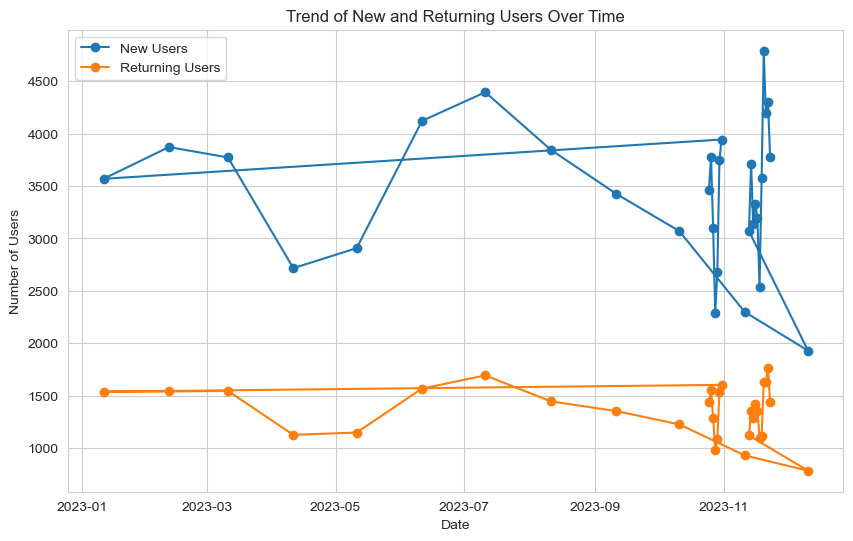

In [29]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['New users'], marker='o', label='New Users')
plt.plot(data['Date'], data['Returning users'], marker='o', label='Returning Users')
plt.title('Trend of New and Returning Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

#### Let’s have a look at the trend of duration over time

In [30]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()

#### Let’s have a look at the correlation between the variables

C:\Users\USER\AppData\Local\Temp\ipykernel_9040\1837028701.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



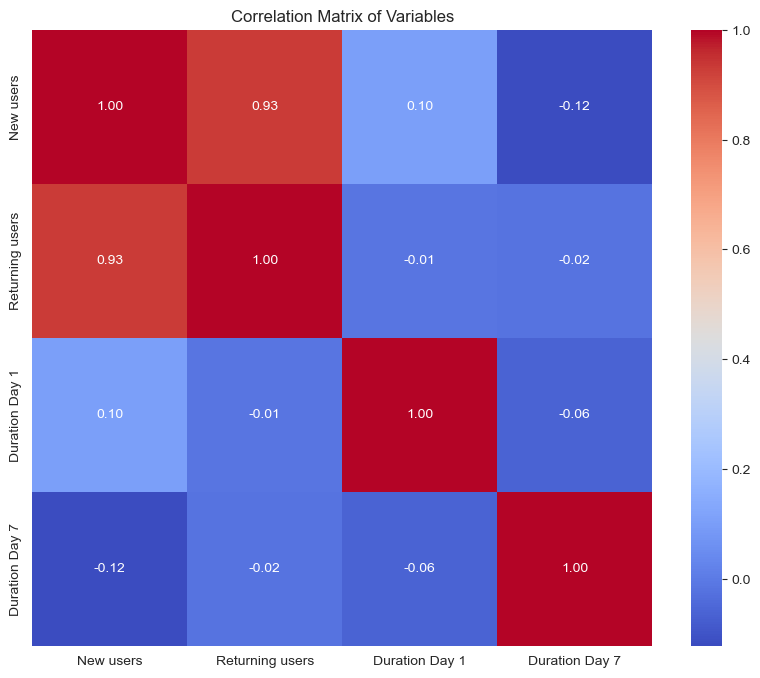

In [33]:
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

Here, the most notable correlation exists between the quantities of new and returning users, suggesting a potential pattern wherein new users transition into returning users

#### 5. Cohort Analysis

For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7

In [34]:
### Grouping the Data
data['Week'] = data['Date'].dt.isocalendar().week

In [35]:
data['Week']

0     43
1     43
2     43
3     43
4     43
5     44
6     44
7      2
8      6
9     10
10    15
11    19
12    23
13    28
14    32
15    37
16    41
17    45
18    50
19    46
20    46
21    46
22    46
23    46
24    46
25    46
26    47
27    47
28    47
29    47
Name: Week, dtype: UInt32

In [36]:
# Calculated weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week  New users  Returning users  Duration Day 1  Duration Day 7
0     2     3568.0           1538.0      154.312925      180.655172
1     6     3871.0           1540.0      188.531250      223.137931
2    10     3772.0           1545.0      189.689394       81.705882
3    15     2716.0           1126.0      200.044643      169.000000
4    19     2907.0           1148.0      166.305556       92.200000


#### Calculated the weekly average of the new and returning users and the duration

In [38]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')



fig1.show()

In [39]:
fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig2.show()

Now, let’s create a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:
1. Average number of new users.
2. Average number of returning users.
3. Average duration on Day 1.
4. Average duration on Day 7.

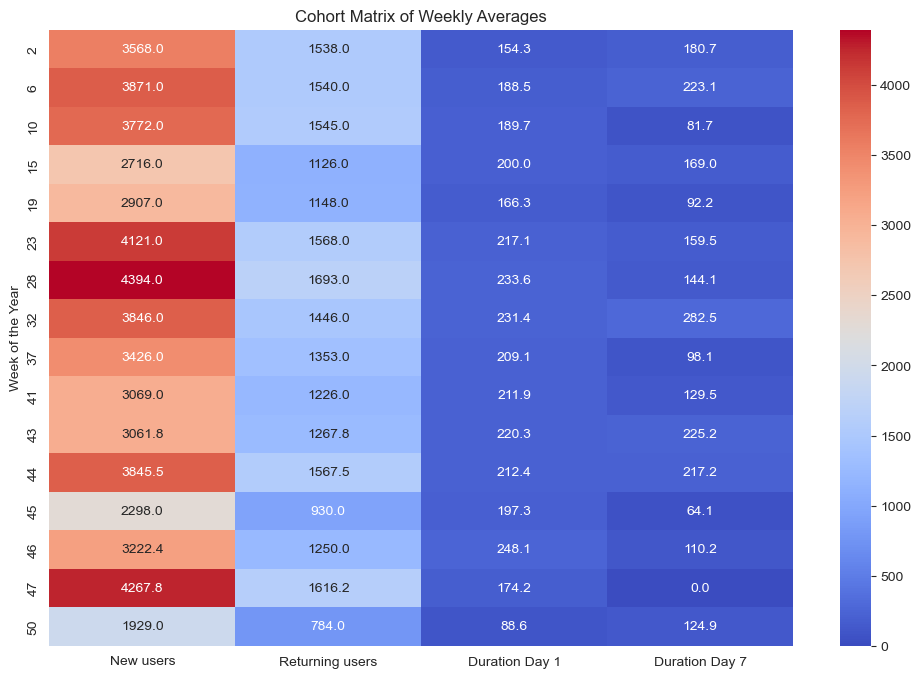

In [40]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

#### Interpretation

We can see that the number of new users and returning users fluctuates from week to week. 
Notably, there was a significant increase in both new and returning users in Week 47. 
The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.